# Lecture 3: Locally Weighted & Logistic Regression

## Info
    Notes by: Rahmani Dibansa
    Notebook Environment: Google Colab (Python 3.10)
    Github: https://github.com/RemainAplomb
    Retrieved from: https://www.youtube.com/watch?v=het9HFqo1TQ&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=3

# Locally weighted regression

## Brief Description

- Locally weighted regression is indeed a non-parametric learning algorithm where the number of parameters grows linearly 
  with the size of the training set. This is because it assigns weights to each training example, and the weights are part of the model parameters.

- Parametric learning algorithms, on the other hand, have a fixed number of parameters regardless of the training set size.

- Locally weighted regression focuses on the local neighborhood of training examples to fit a locally linear model, and predictions are made based on that local model.

- The modified cost function in locally weighted regression includes a weighting function (w_i) to determine the attention paid to each training example during line fitting.

- The weighting function assigns higher weights to examples closer to the point of prediction (x) and lower weights to examples farther away.

- The bandwidth parameter (tau) controls the width of the weighting function, determining the size of the local neighborhood considered.

## How to solve

Weighting Function (w_i): The weighting function determines how much attention is given to each training example based on its distance from the point of prediction (x). It is typically defined as a Gaussian kernel:

    w_i = exp(-((x_i - x) / (2 * tau^2))^2)

Here, x_i is the input feature of the ith training example, x is the point of prediction, and tau is the bandwidth parameter that controls the width of the Gaussian kernel.

Modified Cost Function: In locally weighted regression, the cost function is modified to include the weighting function. The goal is to minimize the weighted sum of squared errors:

    J(theta) = sum(w_i * (y_i - theta^T * x_i)^2)

Here, y_i is the target variable of the ith training example, theta is the parameter vector, and x_i is the feature vector of the ith training example.

Minimization of Cost Function: To find the optimal parameter vector theta, the cost function J(theta) is minimized using an optimization algorithm such as gradient descent. The steps include:

Initialize theta to some initial values.
Iterate until convergence:

    - Compute the gradients of J(theta) with respect to theta.
    - Update theta by taking a step in the opposite direction of the gradients: theta = theta - alpha * gradients
    - Here, alpha is the learning rate that determines the step size in each iteration.
    - The optimization process aims to find the optimal parameter vector theta that minimizes the weighted sum of 
      squared errors for the local neighborhood.


## Sample Code

In [ ]:
pip install bokeh ipywidgets

In [ ]:
# Necessary imports
import numpy as np
from ipywidgets import interact
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot

# Set up notebook output for Bokeh
output_notebook()

# Function to perform locally weighted linear regression
def local_weighted_regression(x0, X, Y, tau):
    # Add bias term
    # We add a bias term to the input features x0 and X. 
    # The bias term is added to account for the intercept term in the linear 
    # regression model. We use the np.r_ function to concatenate a 1 to the 
    # beginning of x0 and np.c_ function to concatenate a column of ones to 
    # the beginning of each row in X.
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]
    
    # Fit model: normal equations with kernel
    # In this part, we compute the weights for each training example using 
    # the weights_calculate function, and then perform the weighted linear 
    # regression using the normal equations with the kernel. The weights are 
    # calculated by passing x0, X, and tau to the weights_calculate function. 
    # The xw matrix is obtained by element-wise multiplication of the transpose 
    # of X with the weights.
    xw = X.T * weights_calculate(x0, X, tau)
    theta = np.linalg.pinv(xw @ X) @ xw @ Y

    # "@" is used to predict value
    # we compute the parameters theta of the linear regression model 
    # using the pseudoinverse (np.linalg.pinv) of the product of xw and X, 
    # multiplied by xw and Y. This is equivalent to solving the normal 
    # equations (X^T * W * X) * theta = X^T * W * Y, where W is a diagonal 
    # matrix of weights.
    return x0 @ theta

# Function to calculate weights
# The weights_calculate function calculates the weights for locally weighted 
# regression. It takes three parameters: x0 (the query point), X (the feature 
# matrix), and tau (the bandwidth parameter). It calculates the weights using 
# the formula np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * (tau **2) )), which 
# applies a Gaussian kernel to measure the similarity between x0 and each point 
# in X. The closer the points are to x0, the higher their weights will be.
def weights_calculate(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * (tau **2) ))

# Function to plot locally weighted regression for different bandwidth values
# The plot_lwr function is responsible for plotting locally weighted regression 
# for different bandwidth values. It takes one parameter: tau (the bandwidth 
# value). It generates a sequence of 300 equally spaced points between -3 and 3 
# as the domain for prediction. Then, for each point x0 in the domain, it 
# calculates the predicted value using the local_weighted_regression function. 
# It creates a plot using the Bokeh library, sets the title to indicate the value 
# of tau, and adds a scatter plot of the original data points (X, Y) with 
# transparency alpha=.3. It also adds a line plot of the predicted values using 
# the domain and prediction, which is colored red with a line width of 2.
def plot_lwr(tau):
    # Prediction
    domain = np.linspace(-3, 3, num=300)
    prediction = [local_weighted_regression(x0, X, Y, tau) for x0 in domain]

    plot = figure(plot_width=400, plot_height=400)
    plot.title.text = 'tau=%g' % tau
    plot.scatter(X, Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
    
    return plot

# In this section, the code defines the distribution and generates a dataset. 
# It sets the number of data points n to 1000, creates a feature vector X using 
# np.linspace with values ranging from -3 to 3, and calculates the corresponding 
# target variable Y using the function np.abs(X ** 3 - 1). It then jitters the 
# feature vector X by adding random noise using np.random.normal. Finally, it 
# shows the plots for different values of tau using the show function and 
# gridplot from the Bokeh library. The resulting plots display the locally 
# weighted regression for each tau value specified in the grid.

# Define distribution
n = 500

# Generate dataset
X = np.linspace(-3, 3, num=n)
Y = np.abs(X ** 3 - 1)

# Jitter X
X += np.random.normal(scale=.1, size=n)

# Show the plots for different values of tau
show(gridplot([
    [plot_lwr(10.), plot_lwr(1.)],  # Plot for tau=10.0 and tau=1.0
    [plot_lwr(0.1), plot_lwr(0.01)]  # Plot for tau=0.1 and tau=0.01
]))

# Probabilistic Interpretation

## Brief Description

- In the probabilistic interpretation, the error term (epsilon_i) represents unmodeled effects and random noise in the regression model.

- The assumption that the error term follows a Gaussian distribution with mean 0 and variance sigma^2 is commonly used in linear regression.

- The probability of y_i given x_i and theta is modeled as a Gaussian distribution with mean theta^T * x_i and variance sigma^2.

- The errors (epsilon_i) are assumed to be independently and identically distributed (IID).

- The likelihood function is indeed the product of the probabilities of individual observations, which is the probability of the data given the parameters (theta).

- Maximum likelihood estimation (MLE) is a widely used approach to estimate the parameters by maximizing the likelihood of the data.

Classification Problem:
- It is true that linear regression is not well-suited for classification problems where the target variable (y) is binary (0 or 1). Linear regression assumes a continuous target variable and may not provide meaningful predictions for classification tasks.

- For classification problems, different algorithms such as logistic regression or support vector machines (SVM) are commonly used.

## How to Solve

Assumptions: In the probabilistic interpretation, we assume that the errors (epsilon_i) in the regression model follow a Gaussian distribution with mean 0 and variance sigma^2. We also assume that the errors are independently and identically distributed (IID).

Likelihood Function: The likelihood function is the probability of the data (target variable values) given the parameters (theta). It is defined as the product of the probabilities of individual observations:

    L(theta) = P(y_1 | x_1; theta) * P(y_2 | x_2; theta) * ... * P(y_m | x_m; theta)

Here, P(y_i | x_i; theta) represents the probability of the target variable y_i given the input feature x_i and parameter vector theta.

Maximum Likelihood Estimation (MLE): To estimate the parameters theta, we choose the values that maximize the likelihood function. In practice, it is often more convenient to maximize the log-likelihood function, which is the logarithm of the likelihood function:

    l(theta) = log(L(theta)) = log(P(y_1 | x_1; theta)) + log(P(y_2 | x_2; theta)) + ... + log(P(y_m | x_m; theta))

Maximizing the log-likelihood is equivalent to minimizing the negative log-likelihood, which leads to the same parameter estimates.

Solving for Parameters: The optimization process for maximizing the likelihood involves finding the parameter values that maximize the log-likelihood function. This can be done using various optimization algorithms such as gradient ascent or numerical optimization methods.

By maximizing the likelihood function, we obtain the parameter values that best fit the assumed Gaussian distribution of the errors to the observed data.

## Sample Code

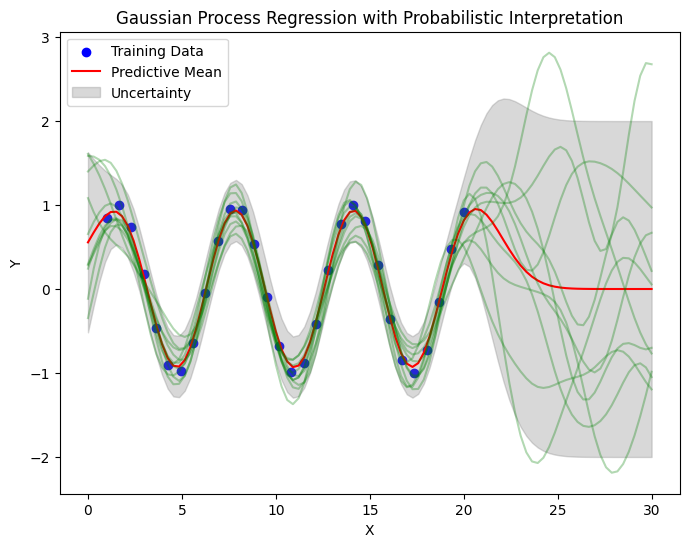

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Define the number of training samples
# start by defining the number of training samples (num_samples) 
# we want to generate.
num_samples = 30

# Generate synthetic data
# We generate synthetic data for training, where X_train represents the 
# input values and y_train represents the corresponding output values. 
# In this example, we generate num_samples equally spaced values between 
# 1 and 20, and compute the corresponding y_train values using the sin 
# function.
X_train = np.linspace(1, 20, num_samples).reshape(-1, 1)  # Training input
y_train = np.sin(X_train)  # Training output

# Define the kernel function
# We define the kernel function using the radial basis function (RBF) with 
# a length scale of 1.0. The kernel determines the smoothness and flexibility 
# of the Gaussian Process model.
kernel = RBF(length_scale=1.0)

# Create Gaussian Process regressor
# We create a Gaussian Process regressor object (gp) with the defined kernel.
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

# Fit the Gaussian Process model to the training data
# We fit the Gaussian Process model to the training data (X_train and y_train).
gp.fit(X_train, y_train)

# Generate test points
# We generate test points (X_test) as a set of equally spaced values 
# between 0 and 30 to evaluate the model's predictions.
X_test = np.linspace(0, 30, 100).reshape(-1, 1)  # Test input

# Make predictions with uncertainty estimates
# We use the trained Gaussian Process model to make predictions on the 
# test points (X_test) and obtain the predictive mean (y_pred) and standard 
# deviation (y_std) as estimates of uncertainty.
y_pred, y_std = gp.predict(X_test, return_std=True)  # Predictive mean and standard deviation

# Sample from the predictive distribution
# We generate additional samples (num_samples) from the predictive distribution 
# using the sample_y method of the Gaussian Process regressor.
num_samples = 10  # Number of samples to generate
samples = gp.sample_y(X_test, n_samples=num_samples)  # Generate samples

# Plot the results
# We plot the results using Matplotlib. The training data is shown as blue 
# dots, the predictive mean is shown as a red line, and the uncertainty 
# range is shown as a shaded gray area. Additionally, we plot the individual 
# samples from the predictive distribution as green lines.
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_test, y_pred, color='red', label='Predictive Mean')
plt.fill_between(X_test.flatten(), y_pred - 2 * y_std, y_pred + 2 * y_std,
                 color='gray', alpha=0.3, label='Uncertainty')
for i in range(num_samples):
    plt.plot(X_test, samples[:, i], color='green', alpha=0.3)

# we set the labels for the x-axis, y-axis, and title of the plot, and add 
# a legend to distinguish the different components.
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Process Regression with Probabilistic Interpretation')
plt.legend()
plt.show()


# Logistic Regression

## Brief Description

So how I understand logistic regression is we modify the linear regression so that we will pass the theta transpose x to a sigmoid function so that it will clip the value to between 0 and 1

- Logistic regression is a classification algorithm where the hypothesis output is between 0 and 1, representing the probability of a certain outcome.

- The hypothesis function is chosen to be the sigmoid or logistic function, which maps any real-valued input to a value between 0 and 1.

- Logistic regression is a type of generalized linear model, which is derived using a broader set of principles.

- The assumptions about the distribution of the target variable y given the features x parameterized by theta are made.

- The probability of y being 1 given x parameterized by theta is equal to the output of the logistic regression hypothesis.

- The probability of y being 0 given x parameterized by theta is 1 minus the output of the logistic regression hypothesis.

- By compressing both equations into a single equation, the probability of y given x parameterized by theta is represented as the logistic regression hypothesis raised to y multiplied by 1 minus the logistic regression hypothesis raised to 1 minus y.

While logistic regression is commonly used for binary classification problems, it can also be extended to handle multi-class classification tasks. This extension is known as multinomial logistic regression or softmax regression.

In multinomial logistic regression, the target variable can have more than two classes. Instead of estimating the probability of a binary outcome, the model estimates the probabilities of each class. The probabilities are obtained using the softmax function, which generalizes the sigmoid function used in binary logistic regression.

The main difference in the formulation of multinomial logistic regression is the use of multiple sets of coefficients, one for each class. Each set of coefficients represents the relationship between the input features and the log-odds of belonging to a particular class.

During training, the model optimizes the coefficients to maximize the likelihood of the observed data across all classes. The decision boundary in multinomial logistic regression is typically represented by multiple hyperplanes that separate the classes in the feature space.

When making predictions, the class with the highest probability is selected as the predicted class for a given instance.

Multinomial logistic regression expands the applicability of logistic regression to handle problems with more than two classes. It is commonly used in scenarios such as image classification with multiple classes, text categorization, and sentiment analysis with multiple sentiment labels.

So, logistic regression can be used for both binary classification and multi-class classification tasks, depending on the number of classes in the target variable and the specific formulation of the algorithm.

## How to solve

Data Preparation: Prepare your training data, consisting of input features X and corresponding binary labels y (0 or 1). Make sure your data is properly preprocessed, normalized, and split into training and test sets.

Hypothesis Function: Choose a suitable hypothesis function that maps the input features X to a value between 0 and 1. In logistic regression, the commonly used hypothesis function is the sigmoid or logistic function:

```
hθ(x) = 1 / (1 + e^(-θ^T * X))
```

Here, hθ(x) represents the predicted probability that y = 1 given input x and parameter vector θ.

Likelihood Function: Define the likelihood function based on the assumed distribution. For logistic regression, we assume that the probability of y being 1 given x parameterized by θ is equal to the output of our hypothesis function, and the probability of y being 0 is 1 minus the output of the hypothesis function. The likelihood function can be written as:

```
L(θ) = ∏(hθ(x)^y) * (1 - hθ(x))^(1 - y)
```

Here, L(θ) represents the likelihood of the data given the parameter vector θ, and the product is taken over all training examples.

Log-Likelihood Function: Take the natural logarithm of the likelihood function to simplify the optimization problem and convert the product into a sum:

```
l(θ) = log(L(θ)) = ∑(y * log(hθ(x)) + (1 - y) * log(1 - hθ(x)))

```

Here, l(θ) represents the log-likelihood function.

Objective: Maximize Log-Likelihood: The objective is to find the parameter vector θ that maximizes the log-likelihood function l(θ). This can be achieved by minimizing the negative log-likelihood (equivalent to maximizing the log-likelihood). The negative log-likelihood function is also known as the cost function or loss function.

Gradient Descent or Newton's Method: Choose an optimization algorithm to iteratively update the parameter vector θ and minimize the cost function. Two commonly used methods are Gradient Descent and Newton's Method.

- Gradient Descent: Update θ using the gradient of the cost function with respect to θ. Here, α is the learning rate, and ∇l(θ) is the gradient of the log-likelihood function with respect to θ. The update rule for Gradient Descent is:

```
θ := θ - α * ∇l(θ)
```

- Newton's Method: Update θ using the inverse of the Hessian matrix (matrix of second partial derivatives) of the log-likelihood function. Here, H is the Hessian matrix, and ∇l(θ) is the gradient of the log-likelihood function with respect to θ.The update rule for Newton's Method is:

```
θ := θ - H^(-1) * ∇l(θ)
```



Iterative Optimization: Repeat the update step until convergence, i.e., until the change in the cost function or parameter vector θ becomes sufficiently small or reaches a predefined threshold. This iterative process will find the optimal parameter vector `

## Sample Code

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression model accuracy (in %): 96.52294853963839


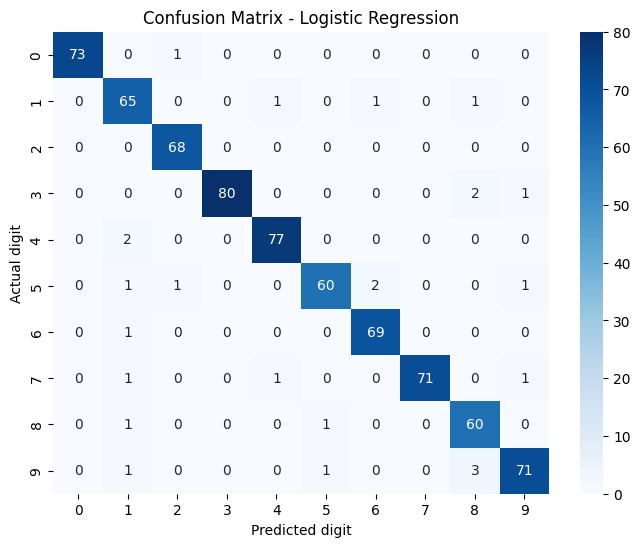

In [36]:
from sklearn import datasets, linear_model, metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Load the digit dataset
digits = datasets.load_digits()

# Define feature matrix (X) and response vector (y)
X = digits.data
y = digits.target

# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Create logistic regression object
reg = linear_model.LogisticRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", accuracy * 100)

# Create a confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted digit")
plt.ylabel("Actual digit")
plt.show()


# Maximum Likelihood Estimation

## Brief Description

- The goal is to find the value of theta that maximizes the likelihood or log-likelihood of the data.

- Given a training set of (x, y) pairs, the likelihood is defined based on the assumed distribution and the logistic regression hypothesis.

- The log-likelihood is derived from the likelihood and is used to simplify the optimization problem.

- The algorithm used to find the value of theta that maximizes the log-likelihood is called Batch Gradient Ascent.

- Batch logistic regression does not have local maximums, so it converges to the global maximum.

Maximum likelihood estimation (MLE) is a statistical method used to estimate the parameters of a statistical model based on observed data. In the context of logistic regression, MLE is used to find the optimal values for the parameter vector theta.

Here's how MLE is applied in logistic regression:

- Likelihood function: The first step is to define the likelihood function, which represents the probability of observing the given data (input features and corresponding target labels) given the parameters theta. In logistic regression, the likelihood function is derived from the assumption that the target labels follow a Bernoulli distribution.

- Log-likelihood function: To simplify the calculations, it is common to work with the log-likelihood function instead of the likelihood function. Taking the natural logarithm of the likelihood function converts the product of probabilities into a sum of logarithms, which is mathematically more convenient.

- Maximizing the log-likelihood: The goal of MLE is to find the values of the parameter vector theta that maximize the log-likelihood function. This is typically achieved through numerical optimization techniques, such as gradient descent or Newton's method. By maximizing the log-likelihood, we are finding the parameter values that make the observed data most probable under the logistic regression model.

- Iterative optimization: The optimization process involves iteratively updating the parameter vector theta until convergence. At each iteration, the gradients or derivatives of the log-likelihood function with respect to the parameters are calculated. These gradients indicate the direction of steepest ascent, and the parameter values are adjusted accordingly to maximize the log-likelihood.

- Convergence and optimal parameters: The iterative optimization continues until a stopping criterion is met, such as reaching a maximum number of iterations or the change in log-likelihood falling below a certain threshold. The final values of the parameter vector theta at convergence represent the estimated optimal parameters for the logistic regression model.

In summary, maximum likelihood estimation is a method used in logistic regression to find the optimal parameter values that maximize the likelihood (or log-likelihood) of observing the given data. It involves iteratively updating the parameters based on the gradients of the log-likelihood until convergence is achieved.

## How to solve

Define the logistic regression model:

- The logistic regression model assumes a linear relationship between the input features and the log-odds of the target variable. It can be represented as:

    hθ(x) = g(θ^T * x)

where hθ(x) is the predicted probability that the target variable equals 1 given the input features x, θ^T is the transpose of the parameter vector θ, and g(z) is the sigmoid function.

Define the likelihood function:

- In logistic regression, we assume that the target variable follows a Bernoulli distribution. The likelihood function is defined as the product of the probabilities of observing the given target labels (y) given the input features (X) and the parameter vector (θ). It can be written as:


    L(θ) = ∏[hθ(xi)]^yi * [1 - hθ(xi)]^(1-yi)

where xi represents the i-th input feature vector and yi represents the corresponding target label (0 or 1).

Take the logarithm:

- To simplify the calculations, it is common to work with the log-likelihood function. Taking the natural logarithm of the likelihood function converts the product of probabilities into a sum of logarithms. The log-likelihood function is given by:


    l(θ) = ∑[yi * log(hθ(xi)) + (1-yi) * log(1 - hθ(xi))]


Find the optimal parameters:

- The goal is to find the values of the parameter vector θ that maximize the log-likelihood function. This is typically achieved using numerical optimization methods such as gradient descent or Newton's method. The optimization algorithm iteratively updates the parameter vector until convergence is reached.

Gradient descent:

- If using gradient descent, the update rule for the parameters at each iteration is given by:

    θj := θj - α * (∑[(hθ(xi) - yi) * xi[j]]) / m

where θj is the j-th component of the parameter vector, α is the learning rate, xi[j] is the j-th feature of the i-th example, and m is the total number of training examples.

Newton's method (optional):

- Alternatively, Newton's method can be used for optimization. In this case, the update rule for the parameters at each iteration is given by:

    θ := θ - inv(H) * ∇l(θ)

where θ is the parameter vector, H is the Hessian matrix of second partial derivatives of the log-likelihood function, and ∇l(θ) is the gradient of the log-likelihood function.

Convergence criteria:

- The iterative optimization process continues until a stopping criterion is met. This can be based on reaching a maximum number of iterations or when the change in log-likelihood or parameters falls below a specified threshold.

Obtain the optimal parameter values:

- Once the optimization process converges, the final parameter values represent the optimal solution for the logistic regression model.

## Sample Code

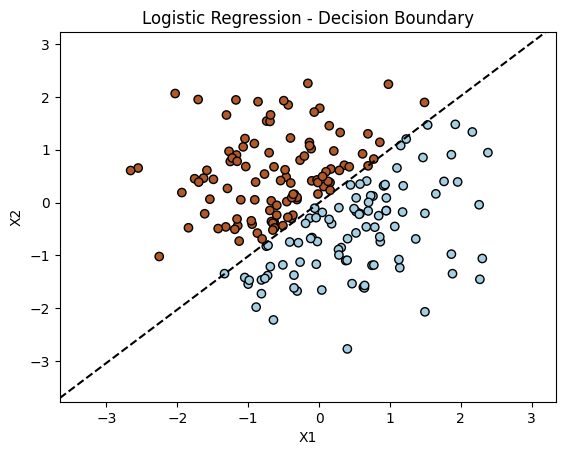

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-z))

def log_likelihood(X, y, theta):
    """Compute the log-likelihood function"""
    h = sigmoid(np.dot(X, theta))
    return np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

def gradient(X, y, theta):
    """Compute the gradient of the log-likelihood function"""
    h = sigmoid(np.dot(X, theta))
    return np.dot(X.T, (h - y))

def logistic_regression(X, y, alpha=0.01, max_iters=1000, tol=1e-6):
    """Perform logistic regression using maximum likelihood estimation"""
    m, n = X.shape
    theta = np.zeros(n)

    for _ in range(max_iters):
        gradient_val = gradient(X, y, theta)
        theta_prev = theta.copy()
        theta -= alpha * gradient_val

        if np.linalg.norm(theta - theta_prev) < tol:
            break

    return theta

# Generate sample data
np.random.seed(0)
X = np.random.randn(200, 2)
intercept = np.ones((200, 1))
X = np.hstack((intercept, X))
true_theta = np.array([0, 1, -1])
y = (X[:, 2] > X[:, 1]).astype(int)  # Set class labels based on the condition x2 > x1

# Perform logistic regression
theta = logistic_regression(X, y)

# Plot the data points and decision boundary
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')

x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x2_min, x2_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
X_grid = np.c_[np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]
Z = sigmoid(np.dot(X_grid, theta))
Z = Z.reshape(xx1.shape)
plt.contour(xx1, xx2, Z, levels=[0.5], colors='k', linestyles='dashed')

plt.title('Logistic Regression - Decision Boundary')
plt.show()


# Newton's Method

## Brief Description

- Newton's method is an alternative optimization algorithm that converges in fewer iterations but is more computationally expensive per iteration.

- Newton's method is used to find the value of theta that satisfies f(theta) = 0, where f(theta) is the derivative of the log-likelihood.

- It starts with an initial point and iteratively updates theta based on the tangent line to the function f.

- At each iteration, the tangent line is used to find the point where it intersects the horizontal axis, which becomes the new point for the next iteration.
The height from the horizontal axis to f at each iteration is denoted as delta.

- The derivative of delta with respect to theta is calculated as the derivative of f divided by delta.
Newton's method enjoys quadratic convergence, meaning that the error decreases quadratically with each iteration.

- When theta is a vector, the update rule involves the Hessian matrix, which is the matrix of second partial derivatives of f.

- The disadvantage of Newton's method is its computational cost in high-dimensional problems, as it requires solving linear systems of equations or inverting large matrices.

You are correct in noticing the similarity between the steps for maximum likelihood estimation (MLE) and Newton's method in logistic regression. This is because Newton's method is commonly used to optimize the parameters in the MLE framework.

In logistic regression, the objective is to maximize the log-likelihood function, which involves finding the optimal parameters that maximize the probability of observing the given data. Newton's method is an iterative optimization algorithm that aims to find the maximum of a function by iteratively updating the parameter estimates based on the first and second derivatives of the log-likelihood function.

In the steps provided earlier for Newton's method in logistic regression, we compute the gradient and Hessian matrix of the log-likelihood function, similar to MLE. Then, we update the parameter estimates using the Newton-Raphson update rule, which involves solving a system of equations using the gradient and Hessian matrix. This iterative process continues until convergence is achieved.

Hence, the similarity arises from the fact that Newton's method is applied within the context of maximum likelihood estimation in logistic regression to find the optimal parameter estimates that maximize the likelihood of the observed data.

## How To solve

Initialize the parameter vector θ to some initial values. This can be done randomly or with any other suitable initialization method.

Calculate the gradient vector ∇L(θ), which represents the first derivative of the log-likelihood function with respect to θ. This can be computed using the formula:

∇L(θ) = X^T(y - h(Xθ))

where X is the feature matrix, y is the target vector, and h(Xθ) is the predicted probabilities obtained by applying the sigmoid function to Xθ.

Calculate the Hessian matrix H, which represents the second derivative of the log-likelihood function with respect to θ. This can be computed using the formula:

H = X^TDX

where D is a diagonal matrix with elements Dii = h(Xθ)(1 - h(Xθ)).

Solve the equation ∇L(θ) = 0 for Δθ, where Δθ represents the change in θ from the current iteration to the next iteration. This can be done by solving the linear system of equations:

HΔθ = ∇L(θ)

You can use a suitable linear algebra method to solve this equation, such as the numpy function np.linalg.solve().

Update the parameter vector θ by subtracting Δθ:

θ_new = θ - Δθ

Repeat steps 2-5 until convergence. Convergence can be determined based on a certain criteria, such as the change in the log-likelihood or the norm of Δθ falling below a specified threshold.

Once convergence is reached, the final parameter vector θ represents the optimal solution.

## Sample Code

In [39]:
import numpy as np

def sigmoid(z):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-z))

def hessian(X, theta):
    """Compute the Hessian matrix of the log-likelihood function"""
    m, n = X.shape
    h = sigmoid(np.dot(X, theta))
    regularization = np.eye(n) * 0.01  # Ridge regression regularization term
    return np.dot(X.T, X * h * (1 - h)) / m + regularization

def gradient(X, y, theta):
    """Compute the gradient of the log-likelihood function"""
    m, n = X.shape
    h = sigmoid(np.dot(X, theta))
    return np.dot(X.T, h - y) / m

def logistic_regression(X, y, alpha=0.01, max_iters=100, tol=1e-6):
    """Perform logistic regression using Newton's method"""
    m, n = X.shape
    intercept = np.ones((m, 1))
    X = np.hstack((intercept, X))
    theta = np.zeros(n+1).reshape(-1, 1)

    for _ in range(max_iters):
        grad = gradient(X, y, theta)
        hess = hessian(X, theta)
        try:
            delta = np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError as e:
            print("Singular matrix. Try a smaller regularization parameter.")
            break
        theta -= alpha * delta

        if np.linalg.norm(delta) < tol:
            break

    return theta.flatten()

# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 2)
intercept = np.ones((100, 1))
X = np.hstack((intercept, X))
theta_true = np.array([0.5, 1.0, -2.0])
y = np.round(sigmoid(np.dot(X, theta_true.reshape(-1, 1))))

# Perform logistic regression
theta = logistic_regression(X, y)

print("Optimal parameter vector:")
print(theta)


Optimal parameter vector:
[ 0.13322694  0.13322694  0.466343   -1.15311941]


    Optimal parameter vector:
    [ 0.13322694  0.13322694  0.466343   -1.15311941]


The parameter vector [0.13322694, 0.13322694, 0.466343, -1.15311941] represents the coefficients for the intercept term and the features in logistic regression.

These coefficients can be interpreted as follows:

The coefficient for the intercept term is 0.13322694.
The coefficient for the first feature is also 0.13322694.
The coefficient for the second feature is 0.466343.
The coefficient for the third feature is -1.15311941.
These coefficients indicate the impact of each feature on the log-odds of the target variable. Positive coefficients suggest a positive relationship with the target variable, while negative coefficients suggest a negative relationship. The magnitudes of the coefficients indicate the strength of the relationship.

You can now use these coefficients to make predictions on new data by computing the dot product of the feature values and the coefficient vector. For example, given a new set of features X_new, you can compute the predicted log-odds as np.dot(X_new, theta) and apply the sigmoid function to obtain the predicted probabilities.